In [73]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

# visualization libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder

# data balancing lib
from imblearn.over_sampling import SMOTE

sns.set()

In [105]:
df = pd.read_csv('../data/customer_churn.csv')
df.set_index('customerID', inplace=True)

In [106]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,DailyCharges,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,2.186667,Mailed check,65.6,593.30
0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,1.996667,Mailed check,59.9,542.40
0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,2.463333,Electronic check,73.9,280.85
0011-IGKFF,Yes,Male,No,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,3.266667,Electronic check,98.0,1237.85
0013-EXCHZ,Yes,Female,No,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,2.796667,Mailed check,83.9,267.40


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null 

# Encoding categorical data

## Encoding binary data

In [78]:
binary_data = df[['Churn', 'gender', 'SeniorCitizen', 'Partner', 
                  'Dependents', 'PhoneService', 'PaperlessBilling']].copy()

In [79]:
# Create an instance of One-hot-encoder for binary data
enc_binary = OneHotEncoder(drop='first')
  
# Passing encoded columns
encoded_binary_data = pd.DataFrame(enc_binary.fit_transform(binary_data).toarray(), columns=enc_binary.get_feature_names_out())

In [80]:
encoded_binary_data.head()

,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes
0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,1.0,1.0


# Encoding categorical data with more than 2 values

In [91]:
categorical_features = df.select_dtypes('object').columns
non_binary_categorical_features = categorical_features.drop(binary_data.columns)

In [92]:
non_binary_categorical_features

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [93]:
# Create an instance of One-hot-encoder for binary data
enc_categorical = OneHotEncoder(drop='first')
  
# Passing encoded columns
encoded_categorical_data = pd.DataFrame(enc_categorical.fit_transform(df[non_binary_categorical_features]).toarray(), 
                                        columns=enc_categorical.get_feature_names_out())

In [99]:
encoded_categorical_data.head()

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Merging encoded data

In [119]:
df_reset_index = df.reset_index()
numerical_data_and_customer_id = df_reset_index[df_reset_index.columns.drop(categorical_features)]
encoded_df = pd.concat([numerical_data_and_customer_id, encoded_binary_data, encoded_categorical_data], axis=1).set_index('customerID')

In [120]:
encoded_df.head()

,tenure,DailyCharges,MonthlyCharges,TotalCharges,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,9,2.186667,65.6,593.30,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
0003-MKNFE,9,1.996667,59.9,542.40,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0004-TLHLJ,4,2.463333,73.9,280.85,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0011-IGKFF,13,3.266667,98.0,1237.85,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
0013-EXCHZ,3,2.796667,83.9,267.40,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Assessing and correcting target imbalance

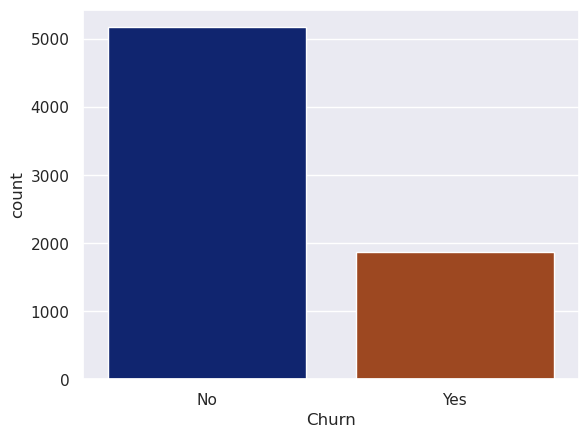

In [16]:
sns.countplot(x='Churn', data=df, palette='dark');

## Using [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#r001eabbe5dd7-1) to balance the target variable

In [25]:
sm = SMOTE(random_state=42)
X, y = df.drop('Churn', axis=1), df['Churn']
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

ValueError: could not convert string to float: 'Female'